## UW.SHW

In [1]:
import os
infolder = '../rms'

In [2]:
import numpy as np
station = 'SHW'

out = np.load(os.path.join(infolder, f'rms_{station}.npz'))
rms = out['rms']
starttimes = out['starttimes']


In [32]:
from obspy import UTCDateTime
# find median of rms
median = np.nanmedian(rms)

# find starttimes where rms < 0.65 median
bad = starttimes[np.where(rms > 500*median)[0]]
bad = [UTCDateTime(b) for b in bad]
badend = [b + 15000 for b in bad]

In [33]:
print(len(bad))

18


In [37]:
# download and check waveforms
from obspy.clients.fdsn import Client

client = Client('IRIS')
bulk = [('UW', 'SHW', '*', 'EHZ', b, be) for b, be in zip(bad, badend)]
st = client.get_waveforms_bulk(bulk)

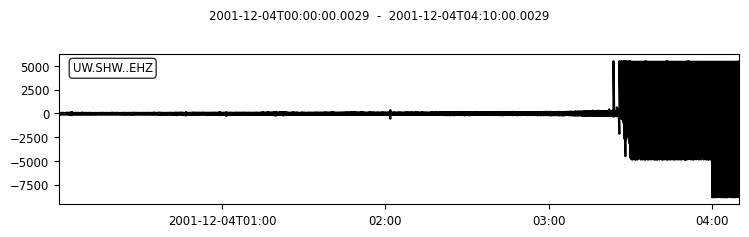

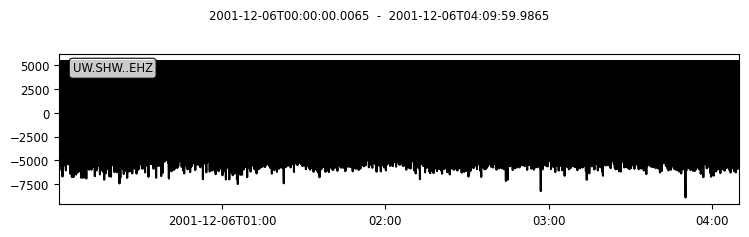

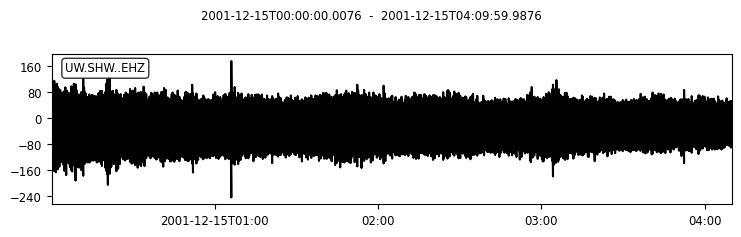

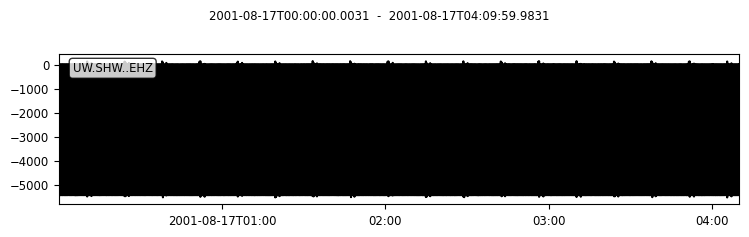

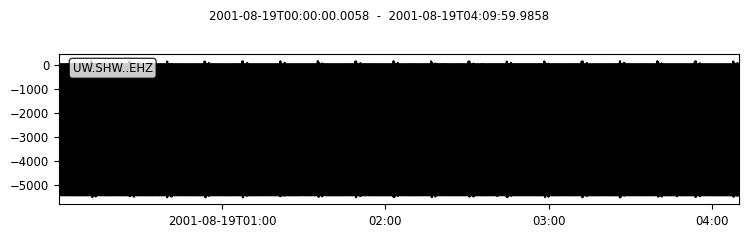

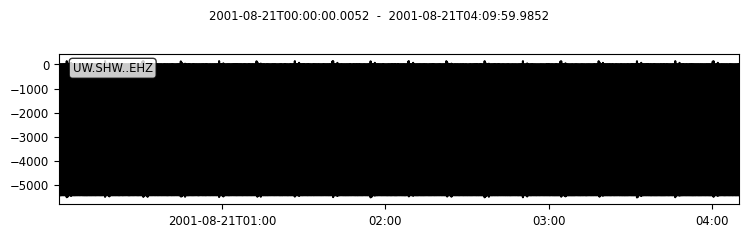

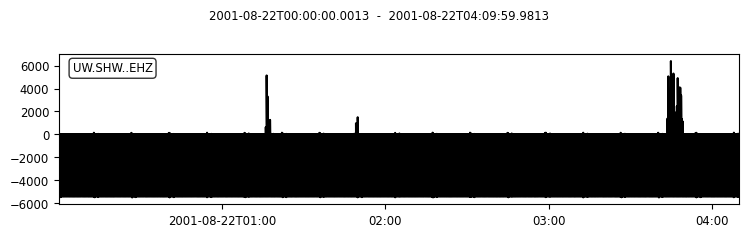

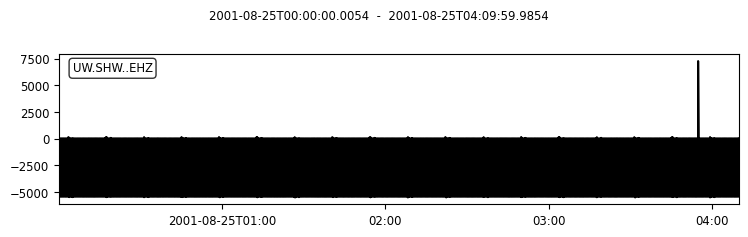

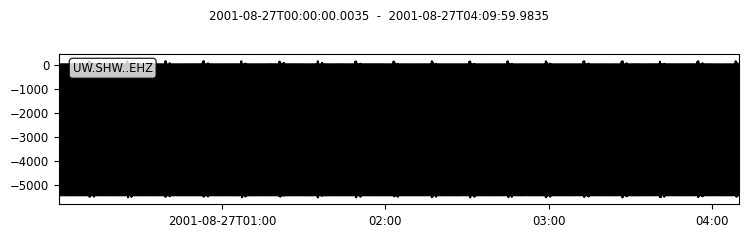

In [38]:
for tr in st:
    tr.plot()

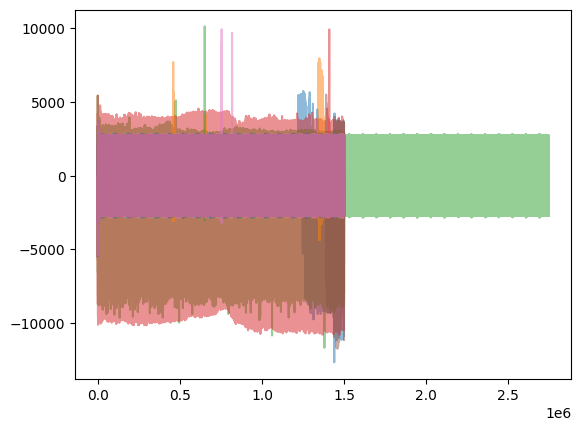

In [39]:
from matplotlib import pyplot as plt
plt.figure()
st.filter('highpass', freq=0.01)
for tr in st:
    plt.plot(tr.data, alpha=0.5)
# plt.ylim((-1000, 1000))